## 1. Thêm thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Tiền xử lý và khám phá dữ liệu

In [2]:
raw_df = pd.read_csv('../data/customer_feedback.csv')
raw_df

,Date published,Name,Review_header,Review_body,Verified_review,Type_of_traveller,Seat_type,Route,Date_flown,Aircraft,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Wifi_and_connectivity,Overall_rating,Recommended
0,2023-12-21,T Maddern,“I couldn’t fault them”,This was our first flight with British Airways...,Trip Verified,Family Leisure,Business Class,London Heathrow to Stockholm,December 2023,A329,4.0,5.0,5.0,NaN,5.0,5,NaN,10,yes
1,2023-12-21,K Pearson,“incompetence in customer service”,I recently encountered a highly disappointing ...,Trip Verified,Solo Leisure,Economy Class,Indianapolis to Mumbai via London Heathrow,December 2023,NaN,1.0,1.0,NaN,NaN,1.0,1,NaN,1,no
2,2023-12-20,C Shaw,“The most ridiculous thing I've heard”,Beware! BA don't provide any refund due to a v...,Not Verified,Family Leisure,Premium Economy,Cyprus to New York,December 2023,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,1,no
3,2023-12-20,C Horner,"""one of the most disgusting onboard meals""",Check in was chaotic and badly organised. Even...,Trip Verified,Solo Leisure,Business Class,Gran Canaria to London Gatwick,December 2023,A321,3.0,4.0,1.0,NaN,3.0,5,NaN,6,yes
4,2023-12-18,C Lowe,“Does BA pay experts to design these breakfasts”,All 4 of our flights were fine in terms of com...,Not Verified,Couple Leisure,Business Class,Belfast City to Atlanta via London Heathrow,November 2023,A320/Boeing 777,4.0,5.0,1.0,3.0,5.0,5,NaN,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2015-05-20,D Chamberlain,British Airways customer review,LHR to Istanbul - excellent service on the out...,Unknown,NaN,Business Class,NaN,NaN,NaN,4.0,4.0,4.0,2.0,NaN,4,NaN,8,yes
2996,2015-05-20,D Chamberlain,British Airways customer review,Brilliant service from the cabin crew and Capt...,Unknown,NaN,Business Class,NaN,NaN,NaN,4.0,5.0,5.0,1.0,NaN,3,NaN,6,yes
2997,2015-05-20,W Coenik,British Airways customer review,Business class. Scheduled to fly from Rome to ...,Unknown,NaN,Business Class,NaN,NaN,NaN,4.0,5.0,5.0,3.0,NaN,4,NaN,10,yes
2998,2015-05-20,P Evans,British Airways customer review,BA seem to be trying harder ground customer se...,Unknown,NaN,Premium Economy,NaN,NaN,NaN,4.0,5.0,4.0,2.0,NaN,5,NaN,8,yes


### 2.1 Định dạng lại tên cột
- Đổi định dạng tên cột `Date published` thành `Date_published` để cùng định dạng tên với các cột còn lại.

In [3]:
raw_df = raw_df.rename(columns={'Date published': 'Date_published'})

### 2.2 Số lượng dòng và cột trong tập dữ liệu là bao nhiêu?

In [4]:
shape = raw_df.shape
nrows = shape[0]
ncols = shape[1]

print(f'Số lượng dòng: {nrows}')
print(f'Số lượng cột: {ncols}')

Số lượng dòng: 3000
Số lượng cột: 19


### 2.3 Khám phá dòng

#### 2.3.1 Mỗi dòng mang ý nghĩa gì? Có dòng nào mang ý nghĩa khác không?
- Mỗi dòng cho biết thông tin chuyến bay và đánh giá của một hành khách về chuyến bay đó của hãng hàng không British Airways.
- Nhìn vào bảng dữ liệu chúng ta thấy không có dòng nào mang ý nghĩa khác.

#### 2.3.2 Có dòng nào bị trùng lắp thông tin không?

In [5]:
num_duplicate_rows = raw_df.duplicated().sum()

print(f'Số lượng dòng bị trùng lắp: {num_duplicate_rows}')

Số lượng dòng bị trùng lắp: 0


### 2.4 Khám phá cột

#### 2.4.1 Mỗi cột mang ý nghĩa gì? 

In [6]:
col_meaning_df = pd.read_csv('../data/schema.csv', index_col='Column')
col_meaning_df

,Meaning
Column,
Date_published,thời gian bài đánh giá được đăng
Name,tên hành khách đánh giá
Review_header,tiêu đề bài đánh giá
Review_body,nội dung bài đánh giá
Verified_review,đánh giá được xác minh/chưa được xác minh
Type_of_traveller,loại khách du lịch
Seat_type,loại chỗ ngồi
Route,tuyến đường bay
Date_flown,ngày khởi hành bay


#### 2.4.2 Có cột nào bị trùng lắp thông tin không?
- Nhìn vào bảng dữ liệu chúng ta thấy không có cột nào bị trùng lắp thông tin, mỗi cột đều mang một ý nghĩa khác nhau.

#### 2.4.3 Lọc ra các cột quan tâm
- Do nhóm chỉ tập trung vào việc phân tích đánh giá của các hành khách về hãng bay nên nhóm sẽ loại bỏ hai cột `Review_header` và `Review_body`. 

In [7]:
raw_df = raw_df.drop(columns=['Review_header', 'Review_body'])

#### 2.4.4 Xem thông tin tổng quát của từng cột

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_published           3000 non-null   object 
 1   Name                     3000 non-null   object 
 2   Verified_review          3000 non-null   object 
 3   Type_of_traveller        2950 non-null   object 
 4   Seat_type                2998 non-null   object 
 5   Route                    2946 non-null   object 
 6   Date_flown               2943 non-null   object 
 7   Aircraft                 1934 non-null   object 
 8   Seat_comfort             2884 non-null   float64
 9   Cabin_staff_service      2872 non-null   float64
 10  Food_and_beverages       2611 non-null   float64
 11  Inflight_entertainments  1852 non-null   float64
 12  Ground_service           2875 non-null   float64
 13  Value_for_money          3000 non-null   int64  
 14  Wifi_and_connectivity   

#### 2.4.5 Loại bỏ cột có phần trăm dữ liệu bị thiếu cao (lớn hơn 70%)
- Cột `Wifi_and_connectivity` có phần trăm dữ liệu bị thiếu xấp xỉ `79%`, cần loại bỏ cột này.

In [9]:
raw_df = raw_df.drop(columns='Wifi_and_connectivity')

#### 2.4.6 Chuyển đổi dữ liệu sang kiểu phù hợp
- Các cột `Date_published` và `Date_flown` có kiểu dữ liệu **object**, cần đổi về kiểu dữ liệu **datetime**.

In [10]:
# Convert sang datetime
raw_df['Date_published'] = pd.to_datetime(raw_df['Date_published'], format='%Y-%m-%d')
raw_df['Date_flown'] = pd.to_datetime(raw_df['Date_flown'], format='%B %Y')

#### 2.4.7 Xử lý chuỗi
- Các giá trị trong cột `Route` cần được tách và lấy ra các thông tin cần thiết. Ví dụ: `Miami to Zurich via London` tách thành [Miami, Zurich, London].
- Không thể xử lý được toàn bộ các giá trị trong cột `Aircraft` do dữ liệu được ghi ở nhiều định dạng khác nhau. Việc bỏ đi cột `Aircraft` không làm ảnh hưởng nhiều đến việc phân tích và dự đoán sau này do cột này không mang lại nhiều thông tin có giá trị.

In [11]:
# Tách chuỗi trong cột Route
raw_df['Route'] = raw_df['Route'].str.rstrip(', ').str.upper()
raw_df['Route'] = raw_df['Route'].replace(r' RETURN', '', regex=True)
raw_df['Route'] = raw_df['Route'].str.split(r'\s* TO \s*|\s* VIA \s*|\s*\/\s*|\s*,\s*|\s*-\s*|\s* OR \s*|\s*&\s*', regex=True)

# Drop cột Aircraft
raw_df = raw_df.drop(columns='Aircraft')

# Xem lại thông tin dữ liệu
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_published           3000 non-null   datetime64[ns]
 1   Name                     3000 non-null   object        
 2   Verified_review          3000 non-null   object        
 3   Type_of_traveller        2950 non-null   object        
 4   Seat_type                2998 non-null   object        
 5   Route                    2946 non-null   object        
 6   Date_flown               2943 non-null   datetime64[ns]
 7   Seat_comfort             2884 non-null   float64       
 8   Cabin_staff_service      2872 non-null   float64       
 9   Food_and_beverages       2611 non-null   float64       
 10  Inflight_entertainments  1852 non-null   float64       
 11  Ground_service           2875 non-null   float64       
 12  Value_for_money          3000 non-

#### 2.4.8 Phân bố dữ liệu ở các cột có dữ liệu số

##### 2.4.8.1 Trong các cột dữ liệu số (numeric), các dữ liệu được phân bố như thế nào?

In [12]:
num_col_info_df = raw_df.select_dtypes(include=['int64', 'float64'])
num_col_info_df

,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Overall_rating
0,4.0,5.0,5.0,NaN,5.0,5,10
1,1.0,1.0,NaN,NaN,1.0,1,1
2,NaN,NaN,NaN,NaN,1.0,1,1
3,3.0,4.0,1.0,NaN,3.0,5,6
4,4.0,5.0,1.0,3.0,5.0,5,6
...,...,...,...,...,...,...,...
2995,4.0,4.0,4.0,2.0,NaN,4,8
2996,4.0,5.0,5.0,1.0,NaN,3,6
2997,4.0,5.0,5.0,3.0,NaN,4,10
2998,4.0,5.0,4.0,2.0,NaN,5,8


In [13]:
# Các hàm tính missing ratio, min, max cũng như các phân vị (làm tròn 1 chữ số thập phân)
def missing_ratio(col):
    return (col.isna().sum() *100/ len(col)).round(1)
def lower_quartile(col):
    return (col.quantile(0.25)).round(1)
def median(col):
    return (col.quantile(0.5)).round(1)
def upper_quartile(col):
    return (col.quantile(0.75)).round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Overall_rating
missing_ratio,3.9,4.3,13.0,38.3,4.2,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
lower_quartile,2.0,2.0,1.0,1.0,1.0,1.0,1.0
median,3.0,3.0,2.0,3.0,3.0,2.0,3.0
upper_quartile,4.0,5.0,4.0,4.0,4.0,4.0,7.0
max,5.0,5.0,5.0,5.0,5.0,5.0,10.0


##### 2.4.8.2 Trực quan hóa missing ratio của từng cột

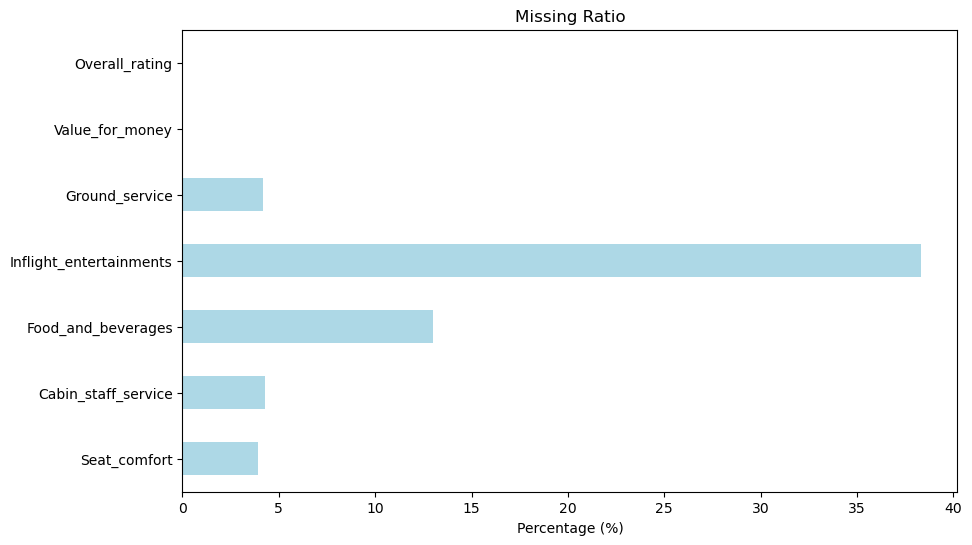

In [14]:
# Tạo một biểu đồ dạng bar để hiển thị missing_ratio
plt.figure(figsize=(10, 6))
num_col_info_df.loc["missing_ratio"].plot(kind="barh", color="lightblue")
plt.title("Missing Ratio")
plt.xlabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

**Nhận xét:**
- Ta thấy được có 2 cột `Overal_rating` và `Value_for_money` không có missing value.
- Những cột có missing với tỉ lệ tương đối nhỏ là `Ground_Service`, `Cabin_staff_service` và `Seat_comfort`.
- Những cột có missing với tỉ lệ tương đối cao `Food_and_beverages` và `Inflight_entertainments`.

##### 2.4.8.3 Xử lý missing value cho các cột dữ liệu số

In [15]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    # Thay thế NaN bằng mean của cột, được làm tròn
    numeric_columns = raw_df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        mean = df[col].mean().round()
        df[col].fillna((mean), inplace=True)

    return df

In [16]:
raw_df = filling_missing_value(df=raw_df)

# Chuyển đổi các cột float64 sang int64
float_columns = raw_df.select_dtypes(include=['float64']).columns
raw_df[float_columns] = raw_df[float_columns].astype('int64')

# Xem lại bảng phân bố sau khi filling missing bởi mean, nhưng làm tròn tới hàng đơn vị, do rating là kiểu số nguyên
num_col_info_df = raw_df.select_dtypes(include=['int64', 'float64'])
num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Overall_rating
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
lower_quartile,2.0,2.0,1.0,2.0,1.0,1.0,1.0
median,3.0,3.0,3.0,3.0,3.0,2.0,3.0
upper_quartile,4.0,5.0,4.0,3.0,4.0,4.0,7.0
max,5.0,5.0,5.0,5.0,5.0,5.0,10.0


##### 2.4.8.4 Trực quan hóa cho các cột chứa dữ liệu số:

Dựa vào bảng phân bố sau khi handle missing value, ta sẽ trực quan hóa những cột dữ liệu số như sau:
- Cột `Overall_rating` có max là 10 sẽ được trực quan hóa riêng với bin là 10.
- Các cột còn lại sẽ được trực quan hóa với bin là 5.

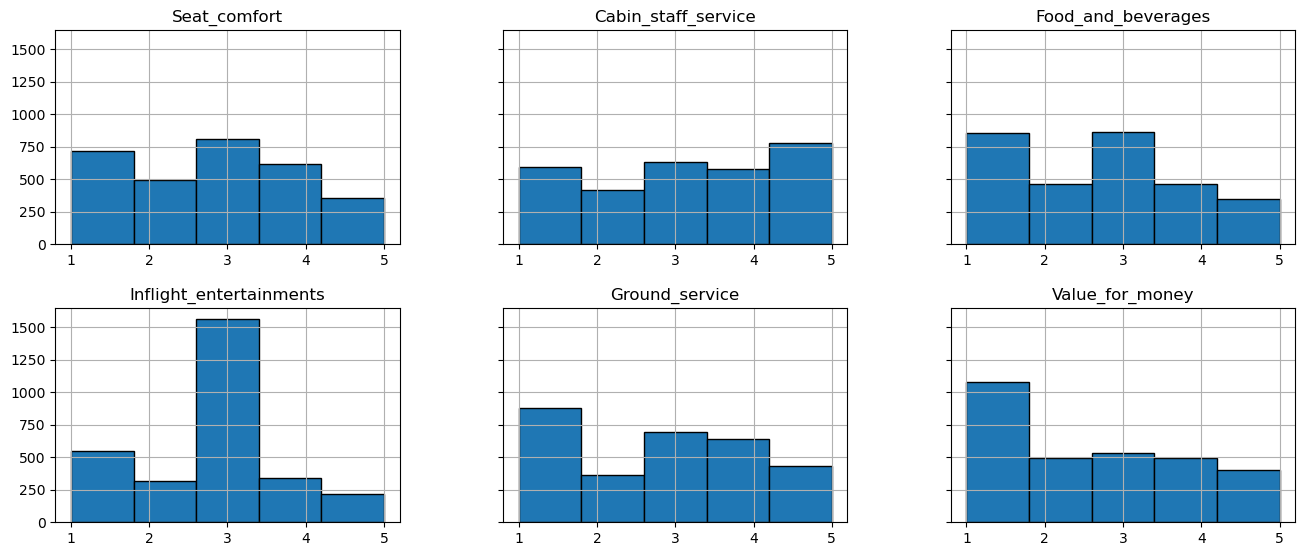

In [17]:
# Visuallize cho các cột khác Overall_rating
numeric_columns = raw_df.select_dtypes(include=['int64']).drop(columns=['Overall_rating'], errors='ignore')
numeric_columns.hist(bins=5, figsize=(16, 10), layout=(3, 3), sharey=True, edgecolor='black')
plt.show()

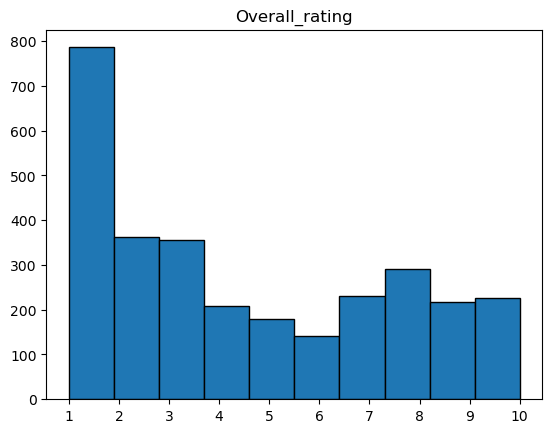

In [18]:
overall_columns = raw_df["Overall_rating"]
plt.hist(overall_columns, bins=10, edgecolor='black')
plt.xticks(range(1, 11))
plt.title('Overall_rating')
plt.show()

#### 2.4.9 Phân bố dữ liệu ở các cột có dữ liệu kiểu phân loại

##### 2.4.9.1 Trong các cột dữ liệu kiểu phân loại, các dữ liệu được phân bố như thế nào?

In [19]:
cat_col_info_df = raw_df.select_dtypes(include='object')
def missing_ratio(columns): 
    return 100 * (1 - columns.count() / len(columns))
def num_values(columns):
    if(columns.name == 'Route'):
        return columns.explode().nunique()
    return columns.nunique()
def value_ratios(columns):
    return (columns.explode().value_counts(normalize=True) * 100).round(1).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Name,Verified_review,Type_of_traveller,Seat_type,Route,Recommended
missing_ratio,0.0,0.0,1.666667,0.066667,1.8,0.0
num_values,2405,3,4,4,487,2
value_ratios,"{'David Ellis': 1.4, 'E Smyth': 1.0, 'Clive Dr...","{'Unknown': 53.1, 'Trip Verified': 39.0, 'Not ...","{'Couple Leisure': 34.1, 'Solo Leisure': 30.5,...","{'Economy Class': 54.1, 'Business Class': 30.9...","{'LONDON': 18.7, 'LHR': 11.1, 'LONDON HEATHROW...","{'no': 63.6, 'yes': 36.4}"


##### 2.4.9.2 Trực quan hoá tỉ lệ missing cho cột dữ liệu kiểu phân loại

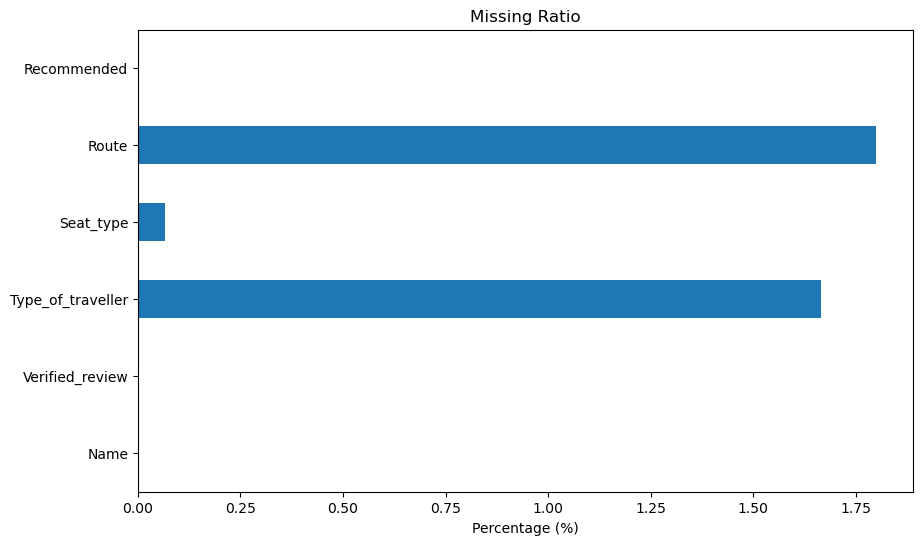

In [20]:
plt.figure(figsize=(10, 6))
cat_col_info_df.loc["missing_ratio"].plot(kind="barh")
plt.title("Missing Ratio")
plt.xlabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

##### 2.4.9.3 Xử lý missing value cho các cột có kiểu dữ liệu phân loại
- Điền giá trị NaN bằng giá trị xuất hiện nhiều nhất trong cột.
- Không xử lý missing value cho cột `Route` do dữ liệu ở cột này khá phức tạp, khó để chọn giá trị để điền. 

In [21]:
cols = ['Seat_type', 'Type_of_traveller']
raw_df[cols] = raw_df[cols].fillna(raw_df[cols].mode().iloc[0])

##### 2.4.9.4 Trực quan hoá cho các cột dữ liệu kiểu phân loại
- Vì các cột `Name, Route` có số lượng quá lớn và không có tác dụng khi trực quan nên việc trực quan sẽ bỏ qua những cột này.

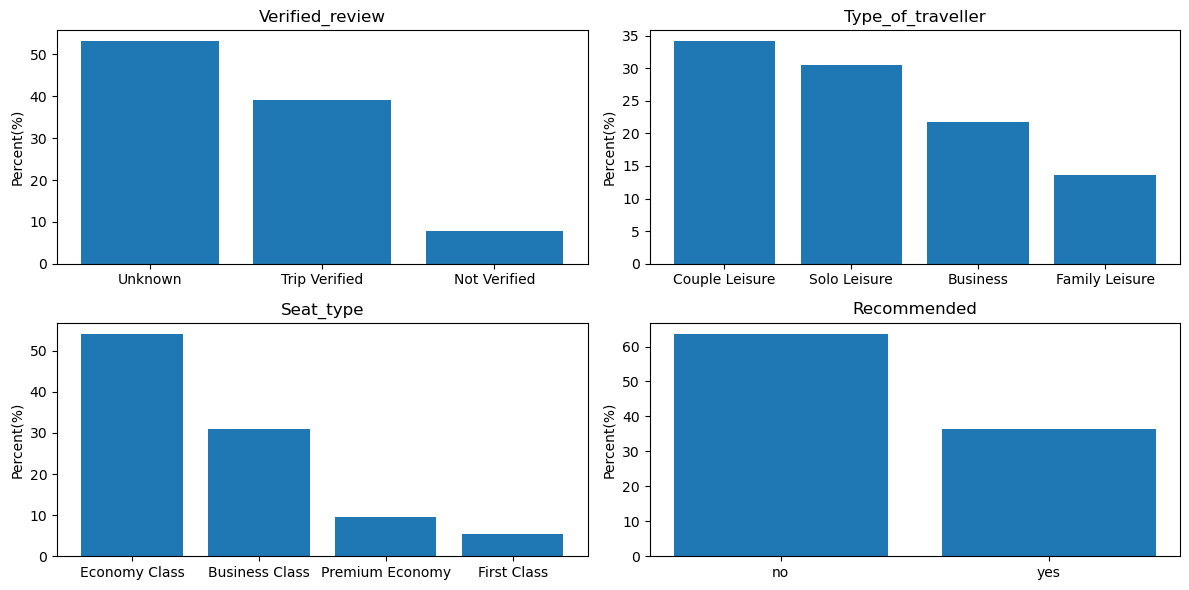

In [22]:
cat_columns = cat_col_info_df.drop(columns=['Name', 'Route'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
for i, column in enumerate(cat_columns.columns[0:4]):
    ax = axes[i // 2, i % 2]
    names = list(cat_columns[column]['value_ratios'].keys())
    values = cat_columns[column]['value_ratios'].values()
    ax.bar(names, values)
    ax.set_title(column)
    ax.set_ylabel('Percent(%)')
plt.tight_layout()
plt.show()

## 3. Dữ liệu thu thập được có hợp lệ không?

### 3.1 Kiểm tra cột Overall_rating và Recommended 
**Tại sao cần kiểm tra 2 cột này?**
- Do giữa chúng có mối liên hệ (tổng đánh giá của khách hàng càng cao thì họ có khả năng đề xuất cao).
- Có thể xảy ra sai sót khi đánh giá làm cho giá trị ở 2 cột này bị đối lập nhau. Ví dụ:
  - Overall_rating là 1 nhưng Recommended là yes.
  - Overall_rating là 10 nhưng Recommended là no.

**Nhiễu ở cột Overall_rating và Recommended có liên quan đến các cột rating khác không?**
- Cột Overall_rating khả năng cao do khách hàng tự đánh giá dựa trên cảm nhận của mình và không được tính dựa trên các rating khác.
=> **Xử lý nhiễu ở 2 cột này không làm ảnh hưởng các cột rating còn lại**.

#### Trực quan hoá (trước khi xử lý nhiễu)
Sử dụng boxplot để dễ dàng quan sát các giá trị nhiễu.

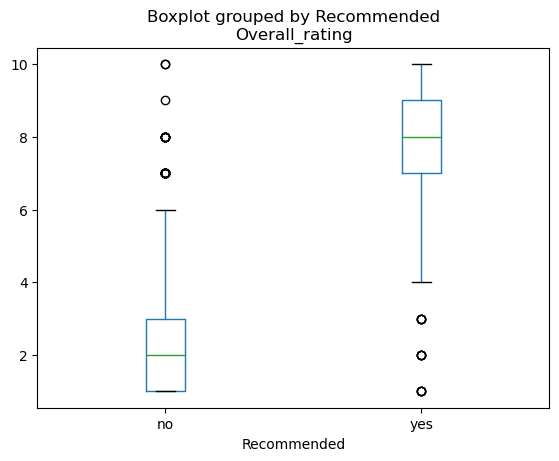

In [23]:
raw_df.boxplot(column='Overall_rating', by='Recommended', grid=False);

#### Xử lý nhiễu
Xử lý nhiễu sử dụng **Interquartile range**:
- Nếu giá trị lớn hơn chặn trên của boxplot thì thay bằng giá trị chặn trên.
- Nếu giá trị nhỏ hơn chặn dưới của boxplot thì thay bằng giá trị chặn dưới.

In [24]:
# Hàm tính giá trị chặn dưới và chặn trên 
def find_lower_upper(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    min = col.min()
    max = col.max()
    IQR = Q3 - Q1
    lower = min if min > (Q1 - 1.5 * IQR) else (Q1 - 1.5 * IQR)
    upper = max if max < (Q3 + 1.5 * IQR) else (Q3 + 1.5 * IQR)
    return lower.round(), upper.round()

def handle_outliers_using_IQR(df, col):
    # Tính giá trị chặn dưới và chặn trên
    lower, upper = find_lower_upper(col)
    
    # Lọc và xử lý outliers nhỏ hơn chặn dưới
    lower_filter = col[col < lower]
    df.loc[lower_filter.index, col.name] = int(lower)
    
    # Lọc và xử lý outliers lớn hơn chặn trên
    upper_filter = col[col > upper]
    df.loc[upper_filter.index, col.name] = int(upper)

handle_outliers_using_IQR(raw_df, raw_df[raw_df['Recommended'] == 'yes']['Overall_rating'])
handle_outliers_using_IQR(raw_df, raw_df[raw_df['Recommended'] == 'no']['Overall_rating'])

#### Trực quan hoá (sau khi xử lý nhiễu) 

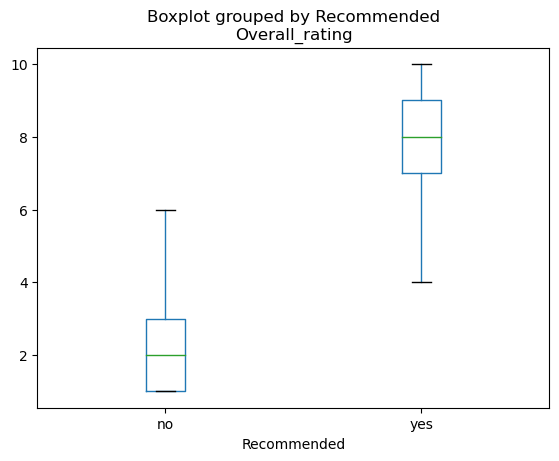

In [25]:
raw_df.boxplot(column='Overall_rating', by='Recommended', grid=False);

## 4. Lưu file sau khi đã tiền xử lý

In [26]:
raw_df.to_csv('../data/cleaned_data.csv', index=False)